## Reading and Understanding the Data

In [4]:
# Supress Warnings
import warnings
warnings.filterwarnings("ignore")


Let us first import NumPy , Pandas , Matplot and Seaborn and read the sharying bike dataset

In [5]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [6]:
#read data
day = pd.read_csv("day.csv")

In [7]:
# Check the head of the dataset
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the sharying bike dataframe

In [8]:
#check the shape
day.shape

(730, 16)

In [9]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
# sns.distplot(day["windspeed"])
# day["windspeed"].skew()

In [12]:
# from sklearn.preprocessing import PowerTransformer
# pt = PowerTransformer()
# transformed = pt.fit_transform(day[["windspeed"]])
# sns.distplot(transformed)
# #print(transformed.skew())

In [13]:
#check info
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Data Preparation

In the data set- convert season, weekday ,mnth, weathersit into categorial variables

In [14]:
day['season'] = day.season.astype(object)
day['season'] = day.season.apply(lambda x : "spring" if x == 1 else x)
day['season'] = day.season.apply(lambda x : "summer" if x == 2 else x)
day['season'] = day.season.apply(lambda x : "fall" if x == 3 else x)
day['season'] = day.season.apply(lambda x : "winter" if x == 4 else x)

check the value counts of season variable

In [15]:
day["season"].astype("category").value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

check the value counts of yr variable

In [16]:
day["yr"].astype("category").value_counts()

1    365
0    365
Name: yr, dtype: int64

In [17]:
day['mnth'] = day.mnth.astype(object)
day['mnth'] = day.mnth.apply(lambda x : "Jan" if x == 1 else x)
day['mnth'] = day.mnth.apply(lambda x : "Feb" if x == 2 else x)
day['mnth'] = day.mnth.apply(lambda x : "Mar" if x == 3 else x)
day['mnth'] = day.mnth.apply(lambda x : "Apr" if x == 4 else x)
day['mnth'] = day.mnth.apply(lambda x : "May" if x == 5 else x)
day['mnth'] = day.mnth.apply(lambda x : "Jun" if x == 6 else x)
day['mnth'] = day.mnth.apply(lambda x : "Jul" if x == 7 else x)
day['mnth'] = day.mnth.apply(lambda x : "Aug" if x == 8 else x)
day['mnth'] = day.mnth.apply(lambda x : "Sep" if x == 9 else x)
day['mnth'] = day.mnth.apply(lambda x : "Oct" if x == 10 else x)
day['mnth'] = day.mnth.apply(lambda x : "Nov" if x == 11 else x)
day['mnth'] = day.mnth.apply(lambda x : "Dec" if x == 12 else x)

check the value counts of mnth variable

In [18]:
day["mnth"].astype("category").value_counts()

Oct    62
May    62
Mar    62
Jul    62
Jan    62
Dec    62
Aug    62
Sep    60
Nov    60
Jun    60
Apr    60
Feb    56
Name: mnth, dtype: int64

check the value counts of holiday variable

In [19]:
day["holiday"].astype("category").value_counts()

0    709
1     21
Name: holiday, dtype: int64

check the value counts of workingday variable

In [20]:
day["workingday"].astype("category").value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [21]:
day['weathersit'] = day.weathersit.astype(object)
day['weathersit'] = day.weathersit.apply(lambda x : "A" if x == 1 else x)
day['weathersit'] = day.weathersit.apply(lambda x : "B" if x == 2 else x)
day['weathersit'] = day.weathersit.apply(lambda x : "C" if x == 3 else x)
day['weathersit'] = day.weathersit.apply(lambda x : "D" if x == 4 else x)

check the unique values in variable weathersit

In [22]:
day["weathersit"].unique()

array(['B', 'A', 'C'], dtype=object)

check the value counts of weathersit variable

In [23]:
day["weathersit"].astype("category").value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [24]:
day['weekday'] = day.weekday.astype(object)
day['weekday'] = day.weekday.apply(lambda x : "Mon" if x == 1 else x)
day['weekday'] = day.weekday.apply(lambda x : "Tues" if x == 2 else x)
day['weekday'] = day.weekday.apply(lambda x : "Wed" if x == 3 else x)
day['weekday'] = day.weekday.apply(lambda x : "Thurs" if x == 4 else x)
day['weekday'] = day.weekday.apply(lambda x : "Fri" if x == 5 else x)
day['weekday'] = day.weekday.apply(lambda x : "Sat" if x == 6 else x)
day['weekday'] = day.weekday.apply(lambda x : "Sun" if x == 0 else x)

check the value counts of weekday variable

In [25]:
day["weekday"].astype("category").value_counts()

Tues     105
Mon      105
Wed      104
Thurs    104
Sun      104
Sat      104
Fri      104
Name: weekday, dtype: int64

In [26]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,1,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tues,1,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thurs,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Visualisation

**understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

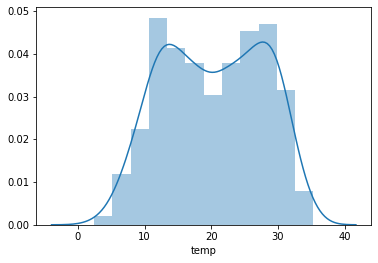

In [27]:
sns.distplot(day["temp"])
plt.show()

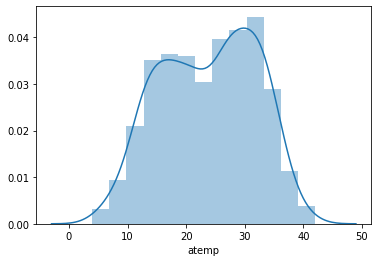

In [28]:
sns.distplot(day["atemp"])
plt.show()

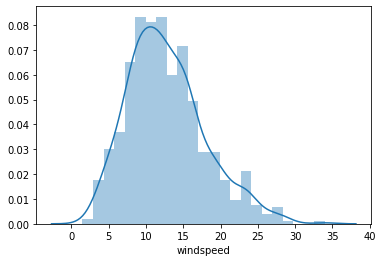

In [29]:
sns.distplot(day["windspeed"])
plt.show()

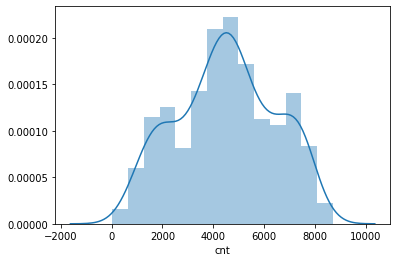

In [30]:
sns.distplot(day["cnt"])
plt.show()

In [31]:
# converting date to datetime format
day["dteday"] = day["dteday"].astype("datetime64")

In [32]:
# check all categorial variables in dataset
day_categorial = day.select_dtypes(exclude = ["float64","datetime64","int64"])
print(day_categorial.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [33]:
day_categorial

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,Tues,B
2,spring,Jan,Wed,A
3,spring,Jan,Thurs,A
4,spring,Jan,Fri,A
...,...,...,...,...
725,spring,Dec,Fri,B
726,spring,Dec,Sat,B
727,spring,Dec,Sun,B
728,spring,Dec,Mon,A


Create a boxplot for some of the variables.

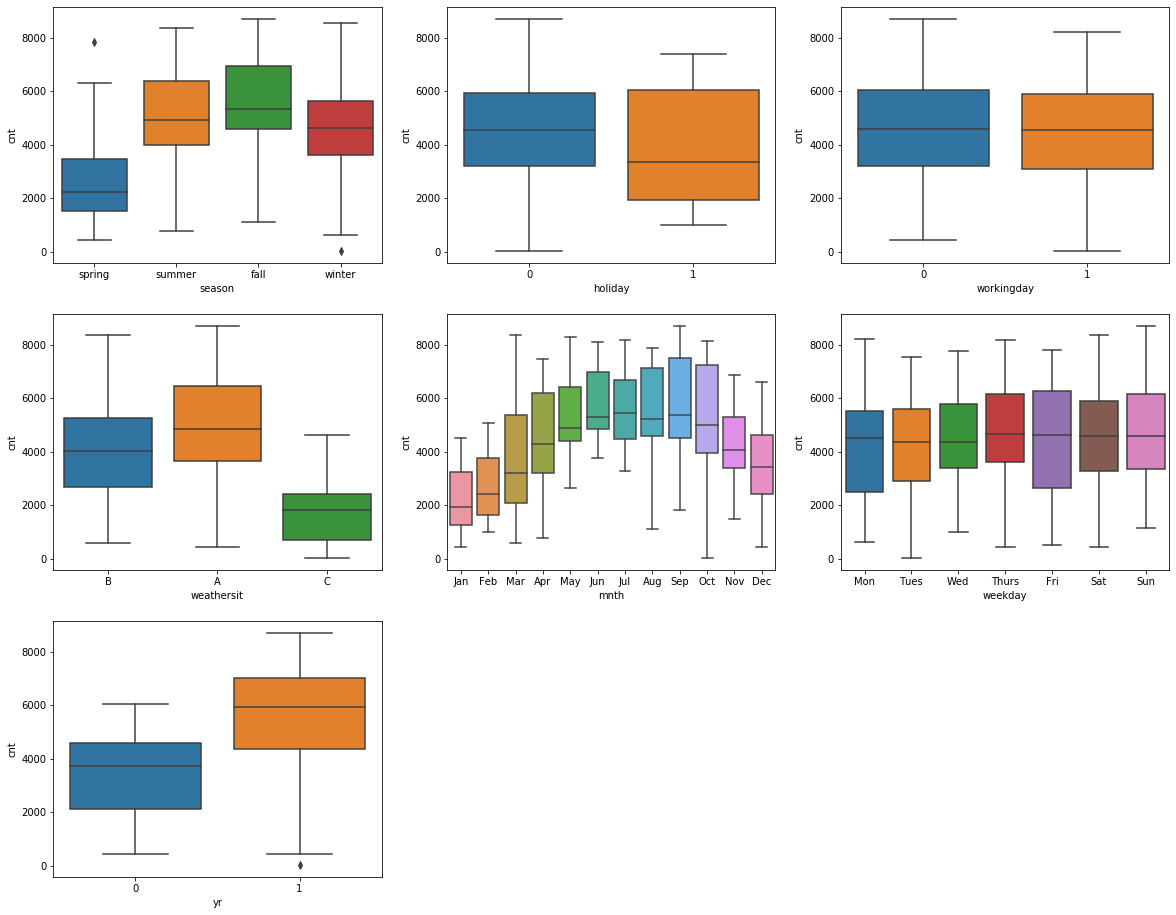

In [34]:
plt.figure(figsize=(20, 16))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.show()

In [35]:
## Numerical Variables
variable_list = ["casual","registered","cnt"]
for var in variable_list:
    day[var] = day[var].astype("float")

In [36]:
day_numeric = day.select_dtypes(include = "float64")
day_numeric

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,247.0,1867.0,2114.0
726,10.386653,12.75230,59.0000,10.416557,644.0,2451.0,3095.0
727,10.386653,12.12000,75.2917,8.333661,159.0,1182.0,1341.0
728,10.489153,11.58500,48.3333,23.500518,364.0,1432.0,1796.0


#### Visualising Numeric Variables

We will make a pairplot of all the numeric variables

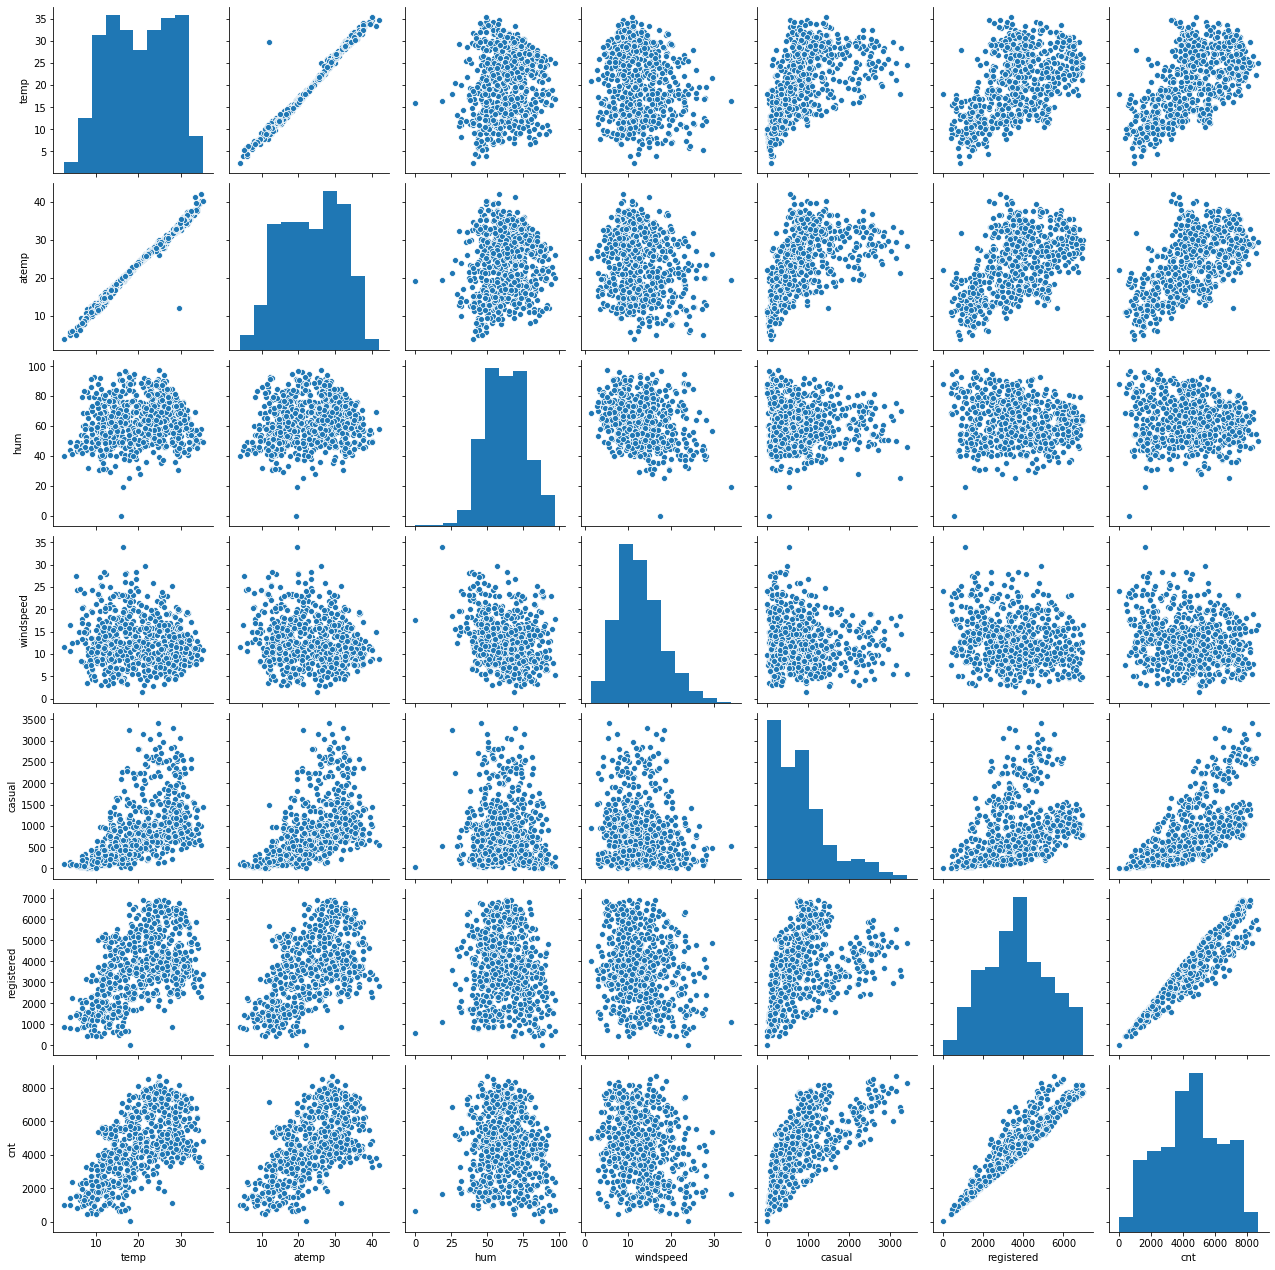

In [37]:
sns.pairplot(day_numeric)
plt.show()

In [38]:
corr = day_numeric.corr()
corr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


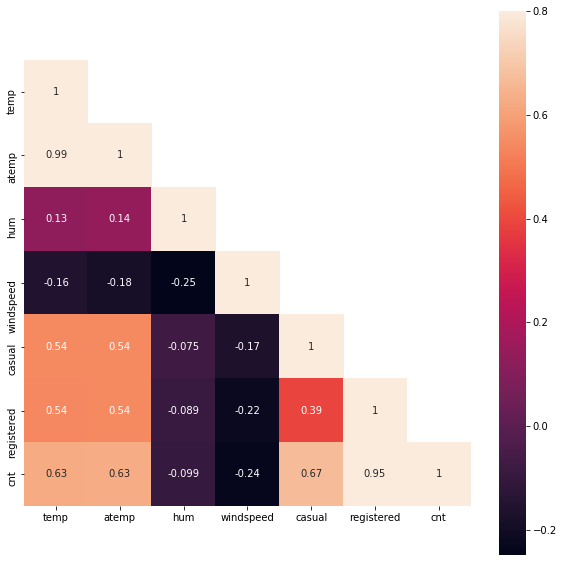

In [39]:
## draw the heatmap for better understanding
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corr,mask=mask,vmax=.8, square = True,annot = True)

In [40]:
# remove atemp as it is highly corelated with temp
day.drop("atemp",axis = 1,inplace = True)
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,1,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,spring,0,Jan,0,Tues,1,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,spring,0,Jan,0,Wed,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,Jan,0,Thurs,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,Jan,0,Fri,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,spring,1,Dec,0,Fri,1,B,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,spring,1,Dec,0,Sat,0,B,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,spring,1,Dec,0,Sun,0,B,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,spring,1,Dec,0,Mon,1,A,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


check the categorical variables

In [41]:
day_categorical = day.select_dtypes(include = ["object"])
day_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,Tues,B
2,spring,Jan,Wed,A
3,spring,Jan,Thurs,A
4,spring,Jan,Fri,A
...,...,...,...,...
725,spring,Dec,Fri,B
726,spring,Dec,Sat,B
727,spring,Dec,Sun,B
728,spring,Dec,Mon,A


### Dummy Variables

The variable `season` has four levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [42]:
# Let's drop the first column from df using 'drop_first = True'
day_dummies = pd.get_dummies(day_categorical, drop_first= True)

In [43]:
day_dummies

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
726,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
727,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [44]:
day = day.drop(day_categorical.columns, axis = 1)
day = day.drop(["casual","registered","instant","dteday"], axis = 1)

In [45]:
# Add the results to the original dataframe

day = pd.concat([day, day_dummies], axis = 1)

In [46]:
# Now let's see the head of our dataframe.
day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,1,14.110847,80.5833,10.749882,985.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Splitting the Data into Training and Testing Sets
the first basic step for regression is performing a train-test split.

In [47]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,7534.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,1796.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,6664.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
578,1,0,1,30.852500,65.9583,8.666718,7261.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,1917.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
350,0,0,1,10.591653,56.0833,16.292189,2739.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


## Scalling
we will use Min-Max scaling

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['temp','hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [49]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


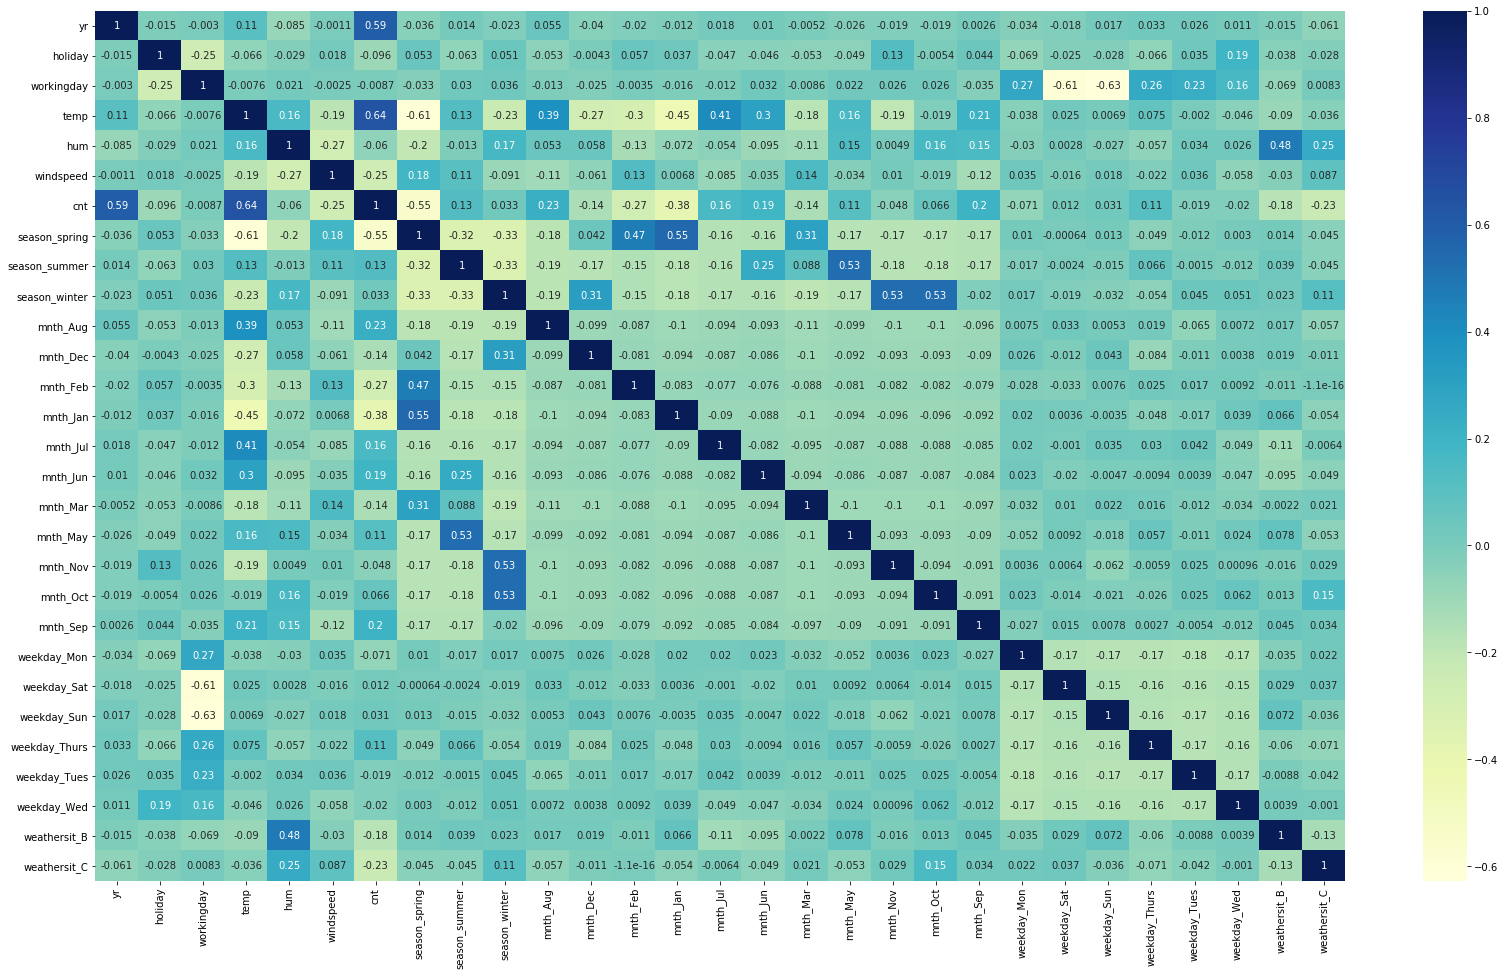

In [50]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (28, 16))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed,
`temp` seems to the correlated to `cnt` the most. Let's see a pairplot for `temp` vs `cnt`.

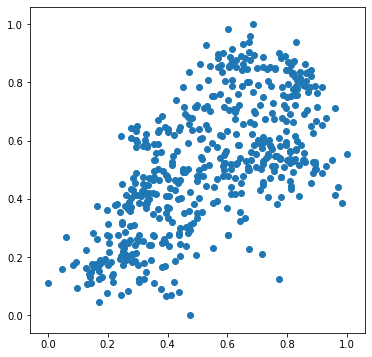

In [51]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [52]:
y_train = df_train.pop('cnt')
X_train = df_train

In [53]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [54]:
np.asarray(df_train)

array([[1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [55]:
X_train.shape

(510, 28)

## Building a Linear Model
This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [56]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [57]:
# Check the parameters obtained

lr.params

const            0.394543
yr               0.230857
holiday         -0.135424
workingday      -0.060524
temp             0.445458
hum             -0.157315
windspeed       -0.183046
season_spring   -0.043705
season_summer    0.042243
season_winter    0.110897
mnth_Aug         0.021507
mnth_Dec        -0.045669
mnth_Feb        -0.037279
mnth_Jan        -0.063612
mnth_Jul        -0.034910
mnth_Jun         0.000975
mnth_Mar         0.000608
mnth_May         0.024064
mnth_Nov        -0.041555
mnth_Oct         0.005790
mnth_Sep         0.086055
weekday_Mon     -0.024633
weekday_Sat     -0.056319
weekday_Sun     -0.049961
weekday_Thurs    0.003863
weekday_Tues    -0.026299
weekday_Wed     -0.011241
weathersit_B    -0.059355
weathersit_C    -0.251511
dtype: float64

In [58]:
# Importing LinearRegression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)  #fit a line

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
print(lm.coef_)
print(lm.intercept_)

[ 0.23085682 -0.13542389 -0.06052424  0.44545797 -0.15731473 -0.18304612
 -0.04370474  0.04224289  0.11089693  0.02150709 -0.04566922 -0.03727876
 -0.06361179 -0.03490968  0.00097451  0.00060798  0.02406416 -0.04155465
  0.00578994  0.08605503 -0.02463298 -0.05631912 -0.04996141  0.00386328
 -0.02629921 -0.01124081 -0.05935514 -0.25151085]
0.39454284834210085


In [60]:
#Let's see the summary of our linear model
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          4.33e-179
Time:                        20:07:31   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3945      0.085      4.640      0.000       0.227       0.562
yr                0.2309      0.008     28.387      0.000       0.215       0.247
holiday          -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday       -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp              0.4455      0.047      9.513      0.000       0.353       0.537
hum              -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed        -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring    -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer     0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter     0.1109      0.028      3.938      0.000       0.056       0.166
mnth_Aug          0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_Dec         -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_Feb         -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_Jan         -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_Jul         -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_Jun          0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_Mar          0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May          0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_Nov         -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_Oct          0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_Sep          0.0861      0.032      2.667      0.008       0.023       0.149
weekday_Mon      -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_Sat      -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_Sun      -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_Thurs     0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_Tues     -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_Wed      -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_B     -0.0594      0.011     -5.637      0.000      -0.080      -0.039
weathersit_C     -0.2515      0.027     -9.455      0.000      -0.304      -0.199
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.035
Skew:                          -0.768   Prob(JB):                     4.06e-46
Kurtosis:                       5.735   Cond. No.                         70.4
================================================================

In [61]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()

rfe1 = RFE(lm, 10)             # running RFE
rfe1.fit(X_train, y_train)
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True False  True  True  True  True False  True False False False
 False  True False False False False False  True False False False False
 False False False  True]
[ 1  1  8  1  1  1  1  3  1 14  6  7  4  1 18 19 11  5 16  1 13  9 10 17
 12 15  2  1]


In [62]:
import statsmodels.api as sm  

col1 = X_train.columns[rfe1.support_]
X_train_rfe1 = X_train[col1]
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_winter,mnth_Jul,mnth_Sep,weathersit_C
653,1.0,1,0,0.509887,0.575354,0.300794,0,1,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,1,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0,0,0


In [63]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.53e-184
Time:                        20:07:36   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3769      0.031     12.133

In [64]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X_train_rfe1.drop("const",axis=1)

vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
5,season_spring,2.40
0,yr,2.06
6,season_winter,1.98
7,mnth_Jul,1.40
8,mnth_Sep,1.20
9,weathersit_C,1.11
1,holiday,1.04


In [65]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE

lm2 = LinearRegression()

rfe2 = RFE(lm2, 7)             # running RFE
rfe2.fit(X_train, y_train)
print(rfe2.support_)
print(rfe2.ranking_)


import statsmodels.api as sm  

col1 = X_train.columns[rfe2.support_]
X_train_rfe2 = X_train[col1]
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()


[ True False False  True  True  True  True False False False False False
 False  True False False False False False False False False False False
 False False False  True]
[ 1  2 11  1  1  1  1  6  3 17  9 10  7  1 21 22 14  8 19  4 16 12 13 20
 15 18  5  1]


,const,yr,temp,hum,windspeed,season_spring,mnth_Jul,weathersit_C
653,1.0,1,0.509887,0.575354,0.300794,0,0,0
576,1.0,1,0.815169,0.725633,0.264686,0,1,0
426,1.0,1,0.442393,0.640189,0.255342,1,0,0
728,1.0,1,0.245101,0.498067,0.663106,1,0,0
482,1.0,1,0.395666,0.504508,0.188475,0,0,0


In [66]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.34e-178
Time:                        20:07:45   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4277      0.030     14.348

In [67]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X_train_rfe2.drop("const",axis=1)

vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,10.47
1,temp,10.37
3,windspeed,3.89
0,yr,2.03
4,season_spring,1.80
5,mnth_Jul,1.35
6,weathersit_C,1.11


In [68]:

X_train_rfe2.drop("hum",axis=1,inplace=True)
X_train_rfe2

,const,yr,temp,windspeed,season_spring,mnth_Jul,weathersit_C
653,1.0,1,0.509887,0.300794,0,0,0
576,1.0,1,0.815169,0.264686,0,1,0
426,1.0,1,0.442393,0.255342,1,0,0
728,1.0,1,0.245101,0.663106,1,0,0
482,1.0,1,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,0,0
578,1.0,1,0.863973,0.187140,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0
350,1.0,0,0.248216,0.431816,0,0,0


In [69]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)
lm3 = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     321.7
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.37e-168
Time:                        20:07:50   Log-Likelihood:                 440.46
No. Observations:                 510   AIC:                            -866.9
Df Residuals:                     503   BIC:                            -837.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2596      0.020     12.986

In [70]:
X = X_train_rfe2.drop("const",axis=1)

vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.95
2,windspeed,3.72
0,yr,2.03
3,season_spring,1.49
4,mnth_Jul,1.26
5,weathersit_C,1.04


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [71]:
#lm2 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
y_train_cnt = lm3.predict(X_train_rfe2)

In [72]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

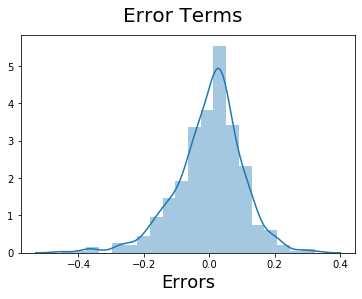

In [73]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

## Making Predictions

In [74]:
X_train_rfe1

,const,yr,holiday,temp,hum,windspeed,season_spring,season_winter,mnth_Jul,mnth_Sep,weathersit_C
653,1.0,1,0,0.509887,0.575354,0.300794,0,1,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,1,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.605840,0.355596,0,0,0,0,0
578,1.0,1,0,0.863973,0.679690,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.435939,0.111379,1,0,0,0,0
350,1.0,0,0,0.248216,0.577930,0.431816,0,1,0,0,0


In [75]:
num_vars

['temp', 'hum', 'windspeed', 'cnt']

In [76]:
df_test

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,29.793347,63.7917,5.459106,6043.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
535,1,0,1,32.082500,59.2083,7.625404,6211.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,4780.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
404,1,0,0,10.865000,56.2083,13.000479,3830.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
198,0,0,1,30.613347,65.1250,14.458868,4458.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
171,0,0,1,27.914153,77.0417,11.458675,4835.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
512,1,1,0,29.212500,67.6250,13.166907,6043.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
200,0,0,1,31.501653,70.7083,7.625739,4332.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Applying the scaling on the test sets

In [77]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [78]:
y_test = df_test.pop('cnt')
X_test = df_test

In [79]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [80]:
col2 = X.columns
col2



Index(['yr', 'temp', 'windspeed', 'season_spring', 'mnth_Jul', 'weathersit_C'], dtype='object')

In [81]:
# Adding a constant variable 
X_test_rfe2 = X_test[col2]

In [82]:
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   temp           219 non-null    float64
 3   windspeed      219 non-null    float64
 4   season_spring  219 non-null    uint8  
 5   mnth_Jul       219 non-null    uint8  
 6   weathersit_C   219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(3)
memory usage: 9.2 KB


In [83]:
# Making predictions
y_pred = lm3.predict(X_test_rfe2)

## Model Evaluation

Text(0, 0.5, 'y_pred')

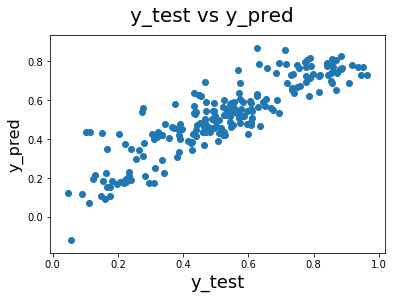

In [84]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## Fetch the R2 value of test set

In [88]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7802124353228017

## Final Interpretation
Train Data Set :
R2 : 0.793

Test Data Set:
R2 : 0.780